<a href="https://colab.research.google.com/github/ddy623/Kaggle-Projects/blob/main/Teen_Addiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',100)
import missingno
from sklearn.model_selection import train_test_split,GridSearchCV
# Set pandas as the default output for sklearn
from sklearn.linear_model import LinearRegression
from sklearn import set_config
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor # NEW

In [3]:
# Load Data
fpath = '/content/drive/MyDrive/CodingDojo/Data Science Projects/teen_phone_addiction_dataset.csv'
df = pd.read_csv(fpath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      3000 non-null   int64  
 1   Name                    3000 non-null   object 
 2   Age                     3000 non-null   int64  
 3   Gender                  3000 non-null   object 
 4   Location                3000 non-null   object 
 5   School_Grade            3000 non-null   object 
 6   Daily_Usage_Hours       3000 non-null   float64
 7   Sleep_Hours             3000 non-null   float64
 8   Academic_Performance    3000 non-null   int64  
 9   Social_Interactions     3000 non-null   int64  
 10  Exercise_Hours          3000 non-null   float64
 11  Anxiety_Level           3000 non-null   int64  
 12  Depression_Level        3000 non-null   int64  
 13  Self_Esteem             3000 non-null   int64  
 14  Parental_Control        3000 non-null   

In [4]:
df.describe()

,ID,Age,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours,Addiction_Level
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,15.969667,5.020667,6.489767,74.947333,5.097667,1.040667,5.590000,5.460333,5.546333,0.507333,1.006733,83.093000,12.609333,2.499233,1.525267,1.016333,5.459667,6.015100,8.881900
std,866.169729,1.989489,1.956501,1.490713,14.684156,3.139333,0.734620,2.890678,2.871557,2.860754,0.500030,0.492878,37.747044,4.611486,0.988201,0.932701,0.648341,2.864572,2.014776,1.609598
min,1.000000,13.000000,0.000000,3.000000,50.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,20.000000,5.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
25%,750.750000,14.000000,3.700000,5.500000,62.000000,2.000000,0.500000,3.000000,3.000000,3.000000,0.000000,0.700000,51.000000,9.000000,1.800000,0.800000,0.500000,3.000000,4.700000,8.000000
50%,1500.500000,16.000000,5.000000,6.500000,75.000000,5.000000,1.000000,6.000000,5.000000,6.000000,1.000000,1.000000,82.000000,13.000000,2.500000,1.500000,1.000000,5.000000,6.000000,10.000000
75%,2250.250000,18.000000,6.400000,7.500000,88.000000,8.000000,1.500000,8.000000,8.000000,8.000000,1.000000,1.400000,115.250000,17.000000,3.200000,2.200000,1.500000,8.000000,7.400000,10.000000
max,3000.000000,19.000000,11.500000,10.000000,100.000000,10.000000,4.000000,10.000000,10.000000,10.000000,1.000000,2.600000,150.000000,20.000000,5.000000,4.000000,3.000000,10.000000,14.000000,10.000000


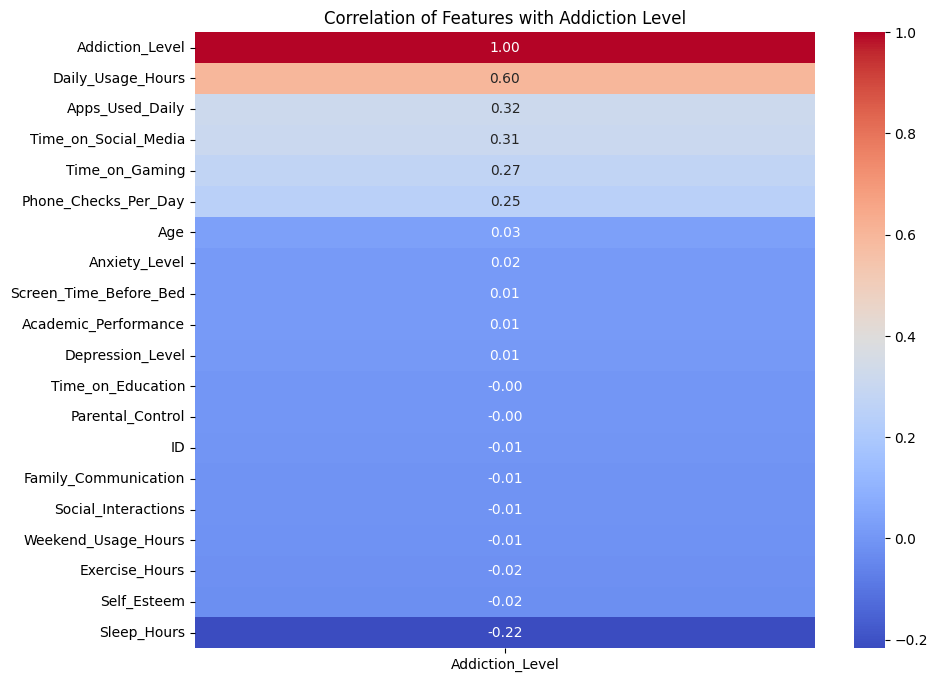

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True)[['Addiction_Level']].sort_values(by='Addiction_Level', ascending=False), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation of Features with Addiction Level')
plt.show()

The data show that daily usage hours, apps used daily, time on social media, time on gaming, and phone clicks per day were all strong contributors to addiction.
The highest correlations was daily usage hours, which showed the more they used the phone, the higher they were addicted to it.

Text(0.5, 0, 'Addiction_Level')

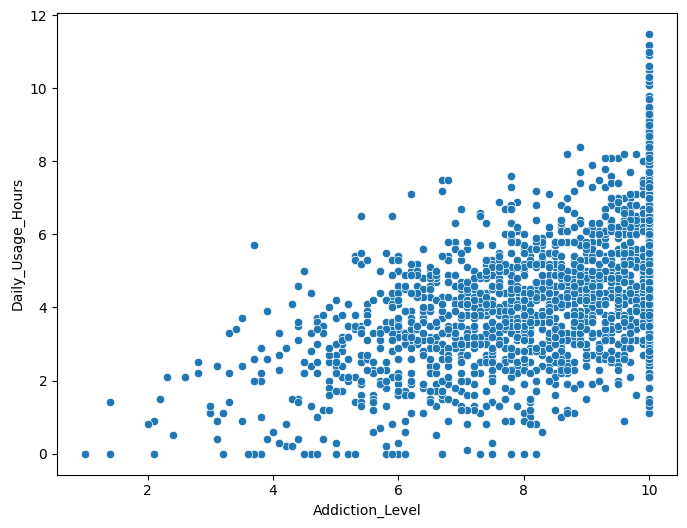

In [6]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='Daily_Usage_Hours',x='Addiction_Level',data=df)
plt.ylabel('Daily_Usage_Hours')
plt.xlabel('Addiction_Level')


Text(0.5, 0, 'Addiction_Level')

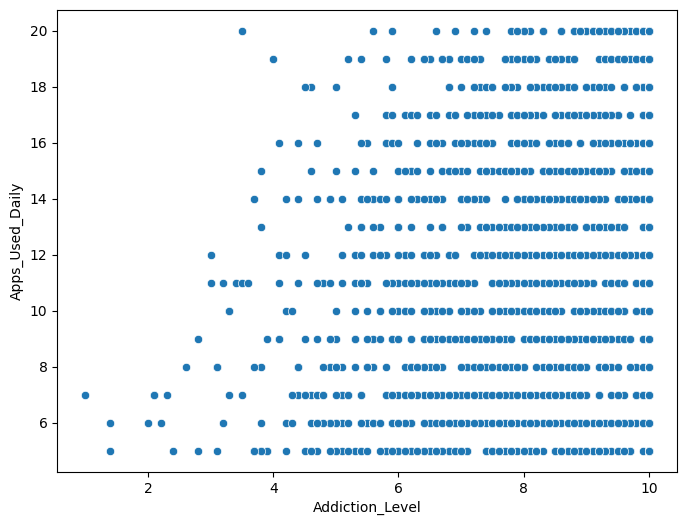

In [7]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='Apps_Used_Daily',x='Addiction_Level',data=df)
plt.ylabel('Apps_Used_Daily')
plt.xlabel('Addiction_Level')

Text(0.5, 0, 'Addiction_Level')

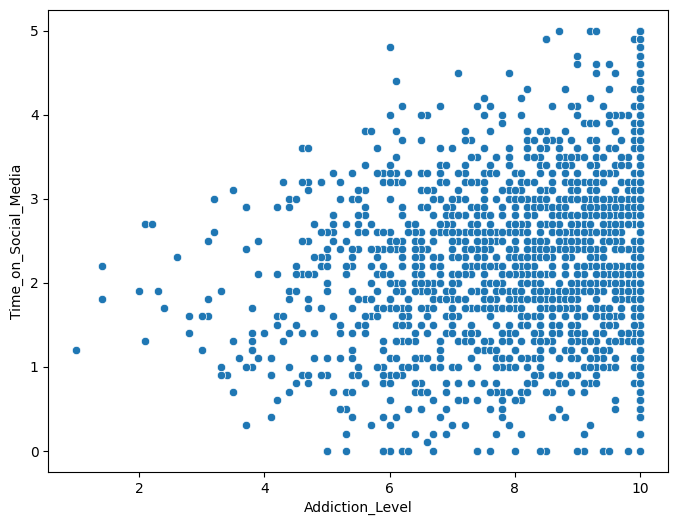

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(y='Time_on_Social_Media',x='Addiction_Level',data=df)
plt.ylabel('Time_on_Social_Media')
plt.xlabel('Addiction_Level')

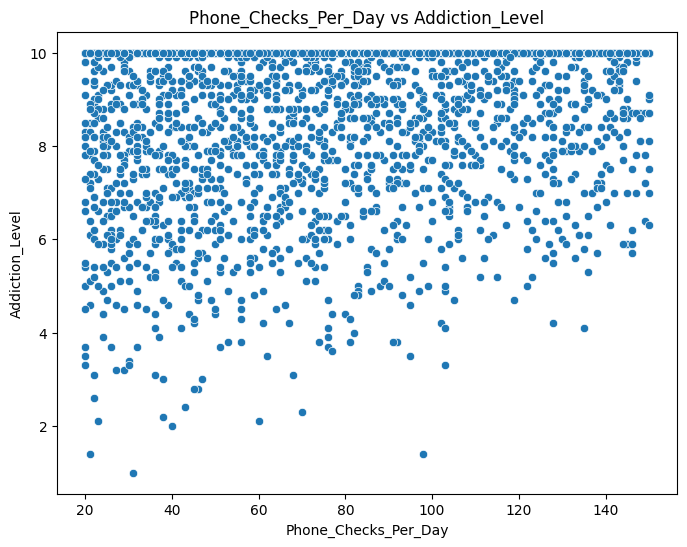

In [9]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Phone_Checks_Per_Day', y='Addiction_Level', data=df)
plt.title('Phone_Checks_Per_Day vs Addiction_Level')
plt.xlabel('Phone_Checks_Per_Day')
plt.ylabel('Addiction_Level')
plt.show()

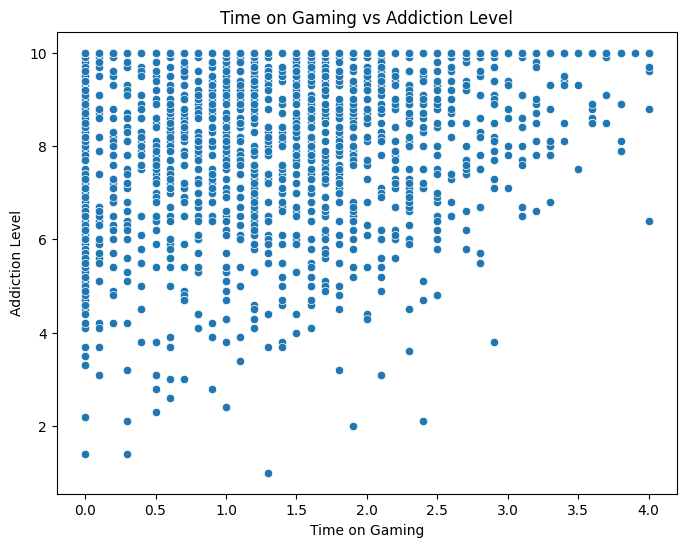

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Time_on_Gaming', y='Addiction_Level', data=df)
plt.title('Time on Gaming vs Addiction Level')
plt.xlabel('Time on Gaming')
plt.ylabel('Addiction Level')
plt.show()

<Axes: >

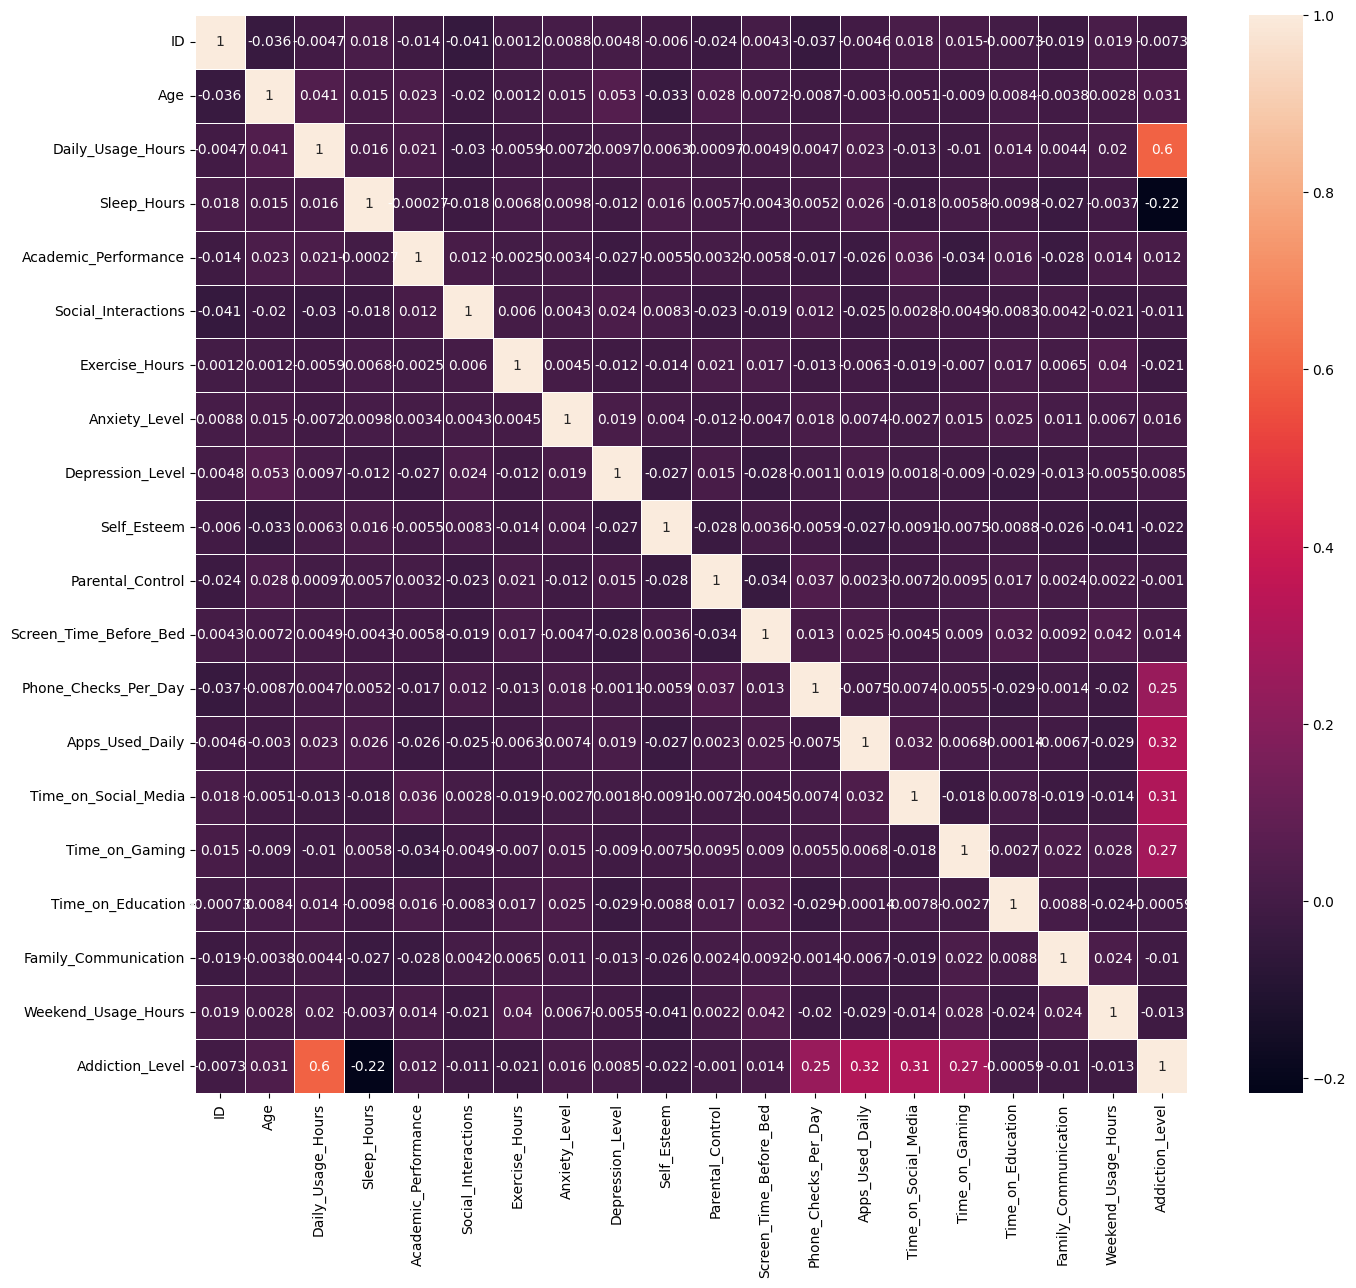

In [11]:
plt.figure(figsize=(16,14))
sns.heatmap(df.corr(numeric_only=True),annot=True,linewidth=0.5)

How does addiction level impact academic performance, as well as anxiety and depression levels?

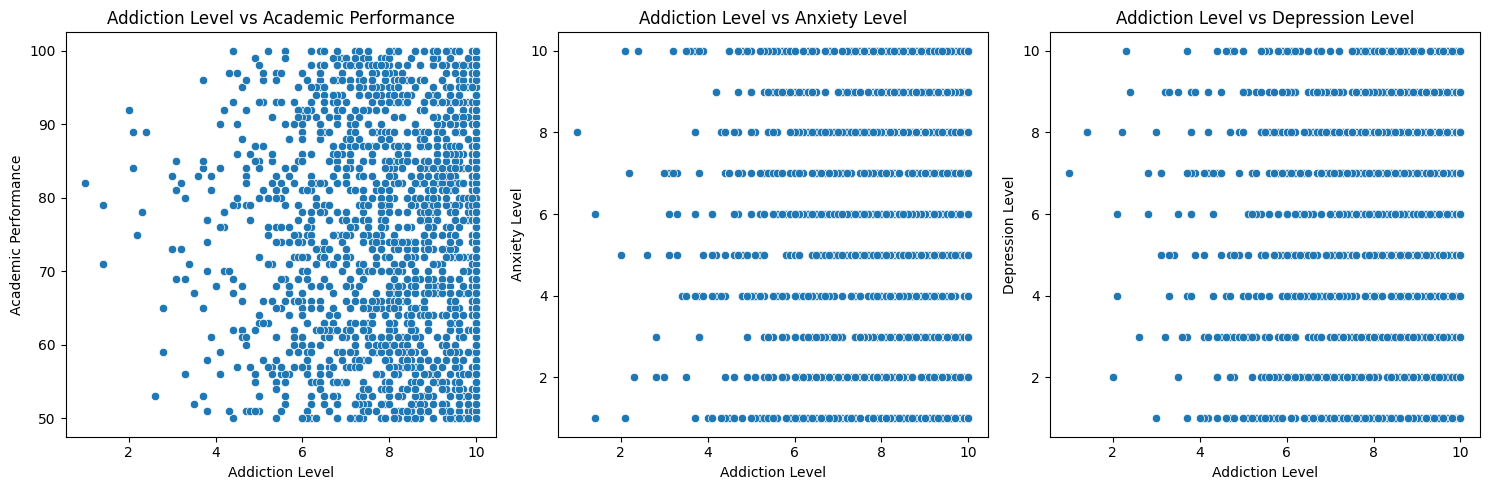

In [12]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Addiction_Level', y='Academic_Performance', data=df)
plt.title('Addiction Level vs Academic Performance')
plt.xlabel('Addiction Level')
plt.ylabel('Academic Performance')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Addiction_Level', y='Anxiety_Level', data=df)
plt.title('Addiction Level vs Anxiety Level')
plt.xlabel('Addiction Level')
plt.ylabel('Anxiety Level')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Addiction_Level', y='Depression_Level', data=df)
plt.title('Addiction Level vs Depression Level')
plt.xlabel('Addiction Level')
plt.ylabel('Depression Level')

plt.tight_layout()
plt.show()

Based upon the data, there is a strong relationship on academic performance and addiction. The data showed that there was not a strong correlation with anxiety or depression among the teenagers.

In [13]:

# Define features (X) and target (y) with only 'Daily_Usage_Hours' as feature
X_single = df[['Daily_Usage_Hours']]
y_single = df['Addiction_Level']

# Split the data into training and testing sets
X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(X_single, y_single, random_state=42)

# Initialize and train the Linear Regression model
model_single = LinearRegression()
model_single.fit(X_train_single, y_train_single)

# Make predictions on the test data
y_pred_single = model_single.predict(X_test_single)

# Evaluate the model
mse_single = mean_squared_error(y_test_single, y_pred_single)
r2_single = r2_score(y_test_single, y_pred_single)

print(f"Model with Daily Usage Hours only:")
print(f"Mean Squared Error: {mse_single:.2f}")
print(f"R-squared: {r2_single:.2f}")

Model with Daily Usage Hours only:
Mean Squared Error: 1.60
R-squared: 0.37


In [14]:

# We can reuse the split data from the previous model with Daily Usage Hours only
# X_train_single, X_test_single, y_train_single, y_test_single

# Initialize and train the Random Forest Regressor model
model_rf_single = RandomForestRegressor(random_state=42)
model_rf_single.fit(X_train_single, y_train_single)

# Make predictions on the test data
y_pred_rf_single = model_rf_single.predict(X_test_single)

# Evaluate the model
mse_rf_single = mean_squared_error(y_test_single, y_pred_rf_single)
r2_rf_single = r2_score(y_test_single, y_pred_rf_single)

print(f"Random Forest Model with Daily Usage Hours only:")
print(f"Mean Squared Error: {mse_rf_single:.2f}")
print(f"R-squared: {r2_rf_single:.2f}")

Random Forest Model with Daily Usage Hours only:
Mean Squared Error: 1.55
R-squared: 0.39


Based on the machine learning data, R-squared is similar for both regression models. It can be assumed that daily usage hours has an impact on addiction but there are other factors also playing a role.